In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters Vector

Load, merge, normalization vector of parameters.

In [2]:
# Loading each csv file
df1 = pd.read_csv('Time_Male_1part.csv')
df2 = pd.read_csv('Time_Male_2part.csv')

Concatenating all four DataFrames into one.

In [3]:
allpatients = pd.concat([df1,df2])
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Status
0,29241.0,-29320.0,6289.637492,1.154522,-0.278947,Zdrowy
1,22856.0,-29453.0,5107.071001,2.979691,0.072257,Zdrowy
2,22061.0,-23299.0,6599.787734,0.712650,-0.001332,Zdrowy
3,9884.0,-13521.0,3353.459070,0.969484,0.309495,Zdrowy
4,13997.0,-19188.0,4252.315146,1.981925,-0.035390,Zdrowy


Features has diffrent rows, so they have to be normalized.

In [4]:
features = allpatients.drop(labels='Status', axis=1).columns
for i in features:
    allpatients[i] = (allpatients[i] - np.mean(allpatients[i]))/np.std(allpatients[i])
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Status
0,2.264942,-1.416545,0.316645,0.756835,-0.489999,Zdrowy
1,1.073054,-1.437500,-0.343569,2.560710,0.357747,Zdrowy
2,0.924651,-0.467857,0.489798,0.320119,0.180116,Zdrowy
3,-1.348430,1.072796,-1.322592,0.573956,0.930400,Zdrowy
4,-0.580656,0.179885,-0.820770,1.574585,0.097906,Zdrowy


Afterwards data have to be suffled, in order to avoid overfitting

In [5]:
allpatients = allpatients.sample(frac=1).reset_index(drop=True)
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Status
0,-0.251183,-0.584769,-0.620533,2.814649,-0.355351,Chory
1,0.804249,0.211083,0.483647,-0.788007,0.812304,Chory
2,0.347654,-0.528361,0.696777,-0.116888,0.138333,Zdrowy
3,-0.383346,2.252786,-1.350531,1.282798,3.437268,Chory
4,1.352872,-0.499684,1.264196,-0.828743,-0.016648,Chory


# PCA

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=3)
pca.fit(allpatients.drop(['Status'], axis=1))
X = pca.transform(allpatients.drop(['Status'], axis=1))
X = pd.DataFrame(X, columns=['A','B','C'])
X['Status'] = allpatients['Status']

In [8]:
from mpl_toolkits.mplot3d import Axes3D

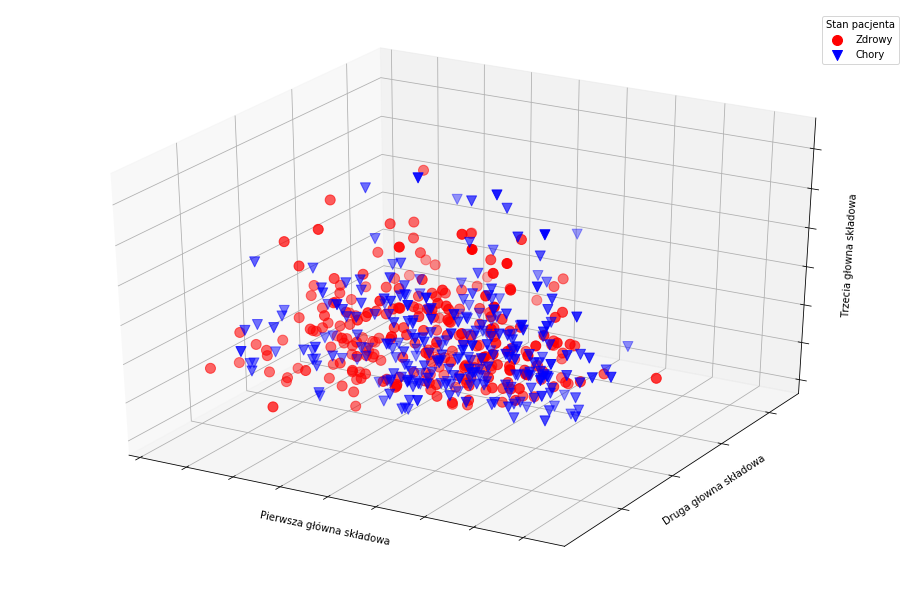

In [9]:
fig = plt.figure()
fig.set_size_inches(16, 10.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[X['Status']=='Zdrowy']['A'],
           X[X['Status']=='Zdrowy']['B'],
           X[X['Status']=='Zdrowy']['C'],
           s=100,
           c='r',
           marker='o',
           label='Zdrowy')
ax.scatter(X[X['Status']=='Chory']['A'],
           X[X['Status']=='Chory']['B'],
           X[X['Status']=='Chory']['C'],
           s=100,
           c='b',
           marker='v',
           label='Chory')
plt.legend(loc='upper right', frameon = True, fontsize=20)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Pierwsza główna składowa', fontsize=20)
ax.set_ylabel('Druga główna składowa', fontsize=20)
ax.set_zlabel('Trzecia główna składowa', fontsize=20)
plt.show()

# Dummy variables

We'll need to convert categorical features (Status) to dummy variables, because our alghoritm can't understant what means 'healthy'.

In [10]:
status = pd.get_dummies(allpatients['Status'],drop_first=True)

In [11]:
allpatients.drop(['Status'],axis=1,inplace=True)

In [12]:
allpatients['Chory'] = status
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Chory
0,-0.251183,-0.584769,-0.620533,2.814649,-0.355351,0
1,0.804249,0.211083,0.483647,-0.788007,0.812304,0
2,0.347654,-0.528361,0.696777,-0.116888,0.138333,1
3,-0.383346,2.252786,-1.350531,1.282798,3.437268,0
4,1.352872,-0.499684,1.264196,-0.828743,-0.016648,0


# Logistic regression algorithm

# Train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(allpatients.drop(['Chory'],axis=1), 
                                                    allpatients['Chory'], 
                                                    test_size=0.20, 
                                                    random_state=42)

# Training and predicting

In [15]:
from sklearn.linear_model import LogisticRegression

In [50]:
logModel = LogisticRegression(C = 0.0075, solver='liblinear')
logModel.fit(X_train, y_train)

LogisticRegression(C=0.0075, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [51]:
prediction = logModel.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.53      0.54      0.53        52
           1       0.53      0.52      0.52        52

   micro avg       0.53      0.53      0.53       104
   macro avg       0.53      0.53      0.53       104
weighted avg       0.53      0.53      0.53       104



In [20]:
print(confusion_matrix(y_test,prediction))

[[28 24]
 [25 27]]


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
clf = RandomForestClassifier(n_estimators=400)

In [63]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
prediction = clf.predict(X_test)

# Evaluation

In [65]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.51      0.48      0.50        52
           1       0.51      0.54      0.52        52

   micro avg       0.51      0.51      0.51       104
   macro avg       0.51      0.51      0.51       104
weighted avg       0.51      0.51      0.51       104



In [26]:
print(confusion_matrix(y_test, prediction))

[[24 28]
 [23 29]]


In [27]:
feature_importance = clf.feature_importances_

[Text(0,0,'Maks'),
 Text(0,0,'Min'),
 Text(0,0,'RMS'),
 Text(0,0,'Kurt'),
 Text(0,0,'Skos')]

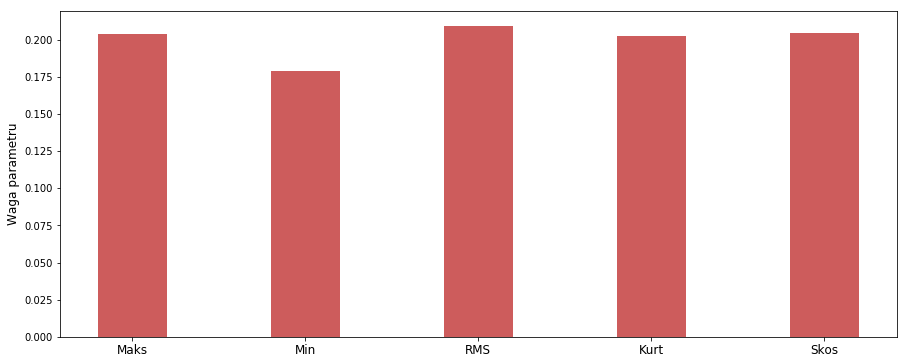

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.grid(b=False)
ind = np.arange(len(feature_importance))  # the x locations for the groups
width = 0.4  # the width of the bars
ax.bar(ind, feature_importance, width, color='IndianRed')
ax.set_ylabel('Waga parametru', fontsize=12)
ax.set_xticks(ind)
ax.set_xticklabels(['Maks', 'Min', 'RMS', 'Kurt', 'Skos'], fontsize=12)

In [29]:
allpatients.drop(['SKEWNESS','Chory'],axis=1).columns

Index(['MAX', 'MIN', 'RMS', 'KURTOSIS'], dtype='object')